In [10]:
import pathlib 
from pathlib import Path
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.image as mpimg
import warnings
warnings.filterwarnings('ignore')
import os
import PIL
import glob
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [11]:
# Defining the path for train and test images
root_path = 'C:/Users/manik/Road Signs classification dataset/'
data_dir_train = pathlib.Path(root_path+'TRAIN/')
data_dir_test = pathlib.Path(root_path+'TEST/')

In [12]:
# Number of images in the train and test set
image_count_train = len(list(data_dir_train.glob('*/*.jpg'))) + len(list(data_dir_train.glob('*/*.png'))) + len(list(data_dir_train.glob('*/*.jpeg')))

print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg'))) + len(list(data_dir_test.glob('*/*.png')))  + len(list(data_dir_train.glob('*/*.jpeg')))
print(image_count_test)

743
280


In [13]:
# Define some parameters for the loader
batch_size = 32
img_height = 180
img_width = 180
num_classes = 30

In [14]:
# TRAIN DATASET
# Dataset is created using seed=123 and tf.keras.preprocessing.image_dataset_from_directory
# Resizing images to the size img_height*img_width, while writing the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'training',
    image_size=(img_height,img_width),
    batch_size = batch_size)

Found 743 files belonging to 30 classes.
Using 595 files for training.


In [15]:
# VALIDATION DATASET
# Dataset is created using seed=123 and tf.keras.preprocessing.image_dataset_from_directory
# Resizing images to the size img_height*img_width, while writing the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'validation',
    image_size=(img_height,img_width),
    batch_size = batch_size)

Found 743 files belonging to 30 classes.
Using 148 files for validation.


In [16]:
# List out all the classes of skin cancer and store them in a list. 
# We can find the class names in the class_names attribute on these datasets. 

class_names = train_ds.class_names
print(class_names)

["Don't Go Left", "Don't Go Left or Right", "Don't Go Right", "Don't Go Straight", "Don't Go straight or left", "Don't Overtake from Left", 'Go Left', 'Go Left or Right', 'Go Right', 'Go Straight', 'Go Straight or right', 'Horn', 'Keep Left', 'Keep Right', 'No Car', 'No Entry', 'No Horn', 'No Stopping', 'No U-Turn', 'Roundabout Mandatory', 'Speed Limit(15Km per h)', 'Speed Limit(30Km per h)', 'Speed Limit(40Km per h)', 'Speed Limit(50Km per h)', 'Speed Limit(5Km per h)', 'Speed Limit(60Km per h)', 'Speed Limit(70Km per h)', 'Speed Limit(80Km per h)', 'Unknown', 'Watch out for Cars']


In [17]:
# List out all the classes of skin cancer and store them in a list. 
# We can find the class names in the class_names attribute on these datasets. 

class_names = val_ds.class_names
print(class_names)

["Don't Go Left", "Don't Go Left or Right", "Don't Go Right", "Don't Go Straight", "Don't Go straight or left", "Don't Overtake from Left", 'Go Left', 'Go Left or Right', 'Go Right', 'Go Straight', 'Go Straight or right', 'Horn', 'Keep Left', 'Keep Right', 'No Car', 'No Entry', 'No Horn', 'No Stopping', 'No U-Turn', 'Roundabout Mandatory', 'Speed Limit(15Km per h)', 'Speed Limit(30Km per h)', 'Speed Limit(40Km per h)', 'Speed Limit(50Km per h)', 'Speed Limit(5Km per h)', 'Speed Limit(60Km per h)', 'Speed Limit(70Km per h)', 'Speed Limit(80Km per h)', 'Unknown', 'Watch out for Cars']


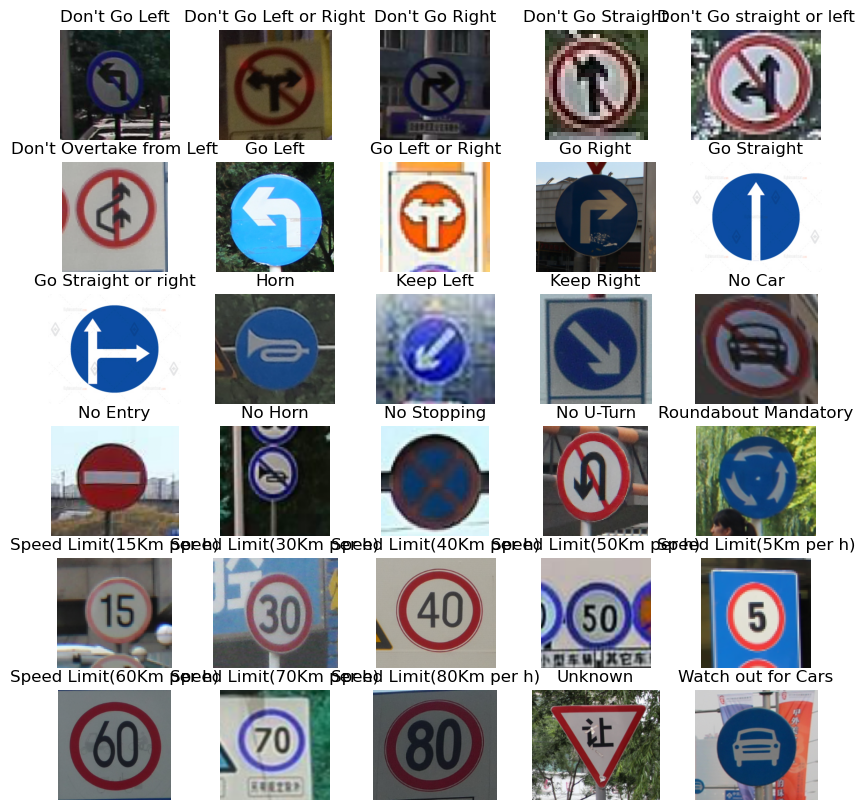

In [18]:
plt.figure(figsize=(10, 10))
num_classes = 30
for i in range(num_classes):
    class_images = list(data_dir_train.glob(class_names[i] + '/*.[jp]*g')) + list(data_dir_train.glob(class_names[i] + '/*.png'))
    if len(class_images) > 0:  
        image = mpimg.imread(str(class_images[0])) 
        plt.subplot(6, 5, i + 1)  
        plt.title(class_names[i])  
        plt.imshow(image)
        plt.axis('off') 
    else:
        print(f"No images found for class: {class_names[i]}")
plt.show()

In [19]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [20]:
# Create a CNN model
# Using layers.experimental.preprocessing.Rescaling, normalize pixel values between (0,1)

# Replace this line in your notebook
model = Sequential([layers.Rescaling(1./255, input_shape=(img_height, img_width, 3))])

# 1st convolution layer
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

# 2nd convolution layer
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

# 3rd convolution layer
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

# 4th convolution layer 
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

# Fully connected layer 1
model.add(Dense(128, activation='relu'))

# Fully connected layer 2
model.add(Dense(128, activation='relu'))

# Output layer
model.add(Dense(num_classes, activation = "softmax"))

In [21]:
# Compile the model using 'adam' optimizer and 'SparseCategoricalCrossentropy' loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [22]:
# View the summary of all layers
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 22, 22, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7744)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       991,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 30)             │         3,870 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,072,254 (4.09 MB)

 Trainable params: 1,072,254 (4.09 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
# Train the model for 20 epochs 
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs)

Epoch 1/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 9s 247ms/step - accuracy: 0.0208 - loss: 3.4091 - val_accuracy: 0.0473 - val_loss: 3.3658
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 235ms/step - accuracy: 0.0912 - loss: 3.2845 - val_accuracy: 0.1622 - val_loss: 2.9678
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 243ms/step - accuracy: 0.2528 - loss: 2.6930 - val_accuracy: 0.3243 - val_loss: 2.4197
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 245ms/step - accuracy: 0.4560 - loss: 1.9242 - val_accuracy: 0.5068 - val_loss: 1.8140
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 233ms/step - accuracy: 0.6390 - loss: 1.2518 - val_accuracy: 0.7297 - val_loss: 1.5292
Epoch 6/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 255ms/step - accuracy: 0.7962 - loss: 0.7500 - val_accuracy: 0.7635 - val_loss: 1.2198
Epoch 7/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 251ms/step - accuracy: 0.8816 - loss: 0.4069 - val_accuracy: 0.8311 - val_loss: 0.9380
Epoch 8/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 233ms/step - accuracy: 0.9426 - loss: 0.1555 - val_accuracy: 0.

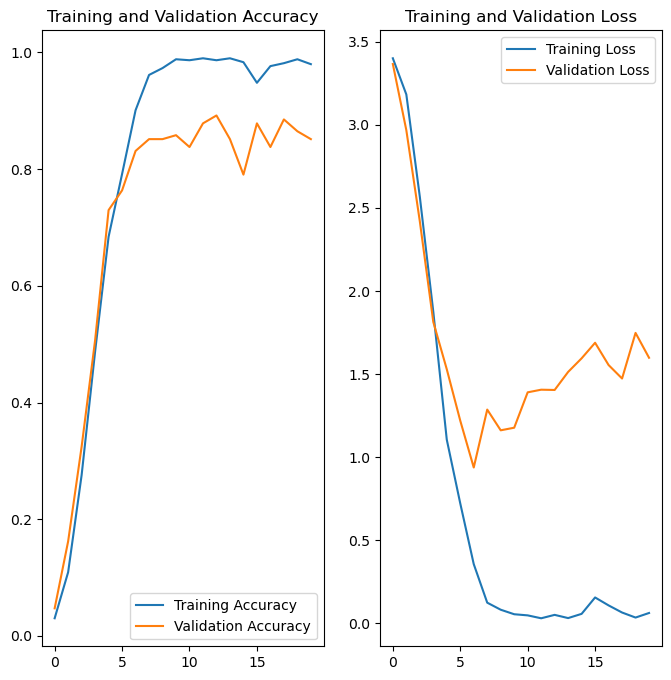

In [24]:
# Visualize the results 
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [25]:
# Since the model overfits, data augumentation strategy is used
# Data augmentation is artificially increasing the amount of data needed to train robust AI models

data_aug = keras.Sequential([
                             layers.RandomFlip(mode="horizontal_and_vertical",
                                                                          input_shape=(img_height,img_width,3)),
                             layers.RandomRotation(0.2, fill_mode='reflect'),
                             layers.RandomZoom(height_factor=(0.2, 0.3), 
                                                                          width_factor=(0.2, 0.3), fill_mode='reflect')])

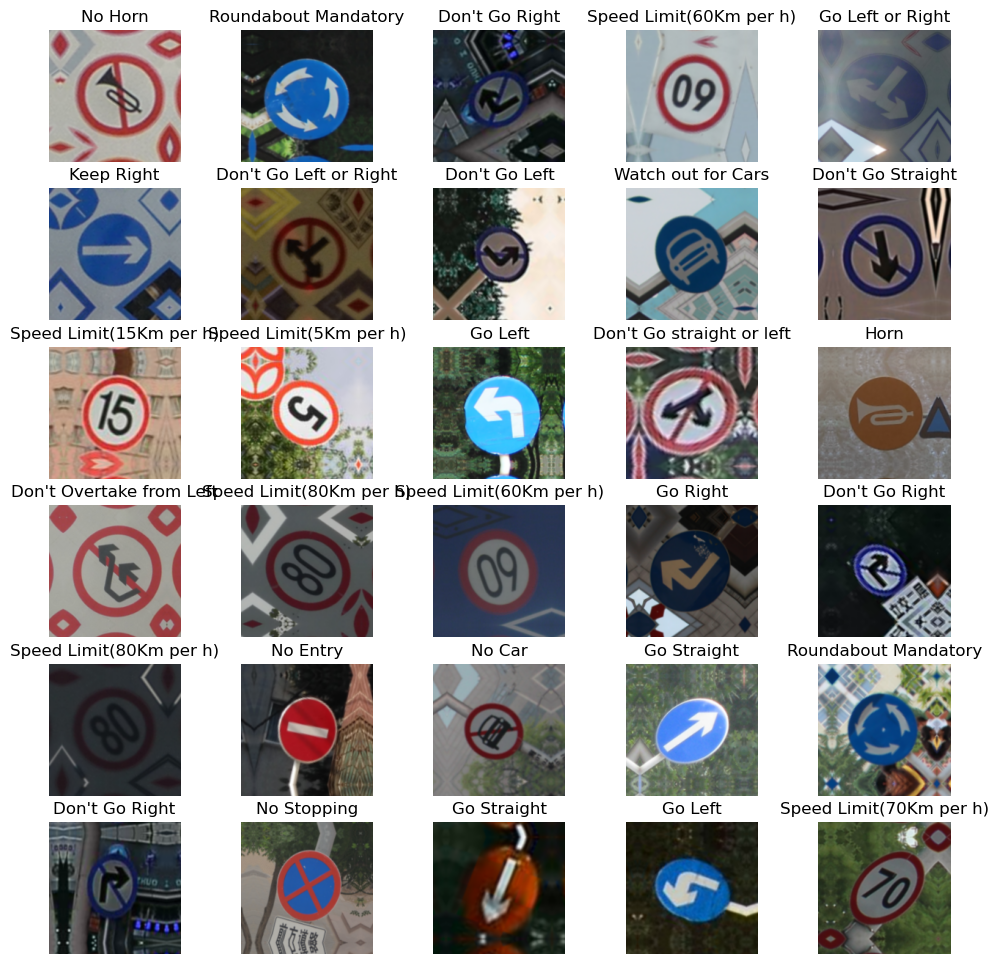

In [26]:
# Visualize the augmentation strategy for one instance
plt.figure(figsize=(12, 12))

# Get one batch of images and labels from the training dataset
for images, labels in train_ds.take(1):
    for i in range(min(30, len(images))):  
        ax = plt.subplot(6, 5, i + 1)  
        plt.imshow(data_aug(images)[i].numpy().astype("uint8"))  
        plt.title(class_names[labels[i]])  
        plt.axis("off") 

In [27]:
# Let us create a new model with Dropout layer and l2 regularizer as the previous model overfits
# Use the augmented data for creating the model
# Let us add one more layer to improve accuracy

model = Sequential([data_aug,
                    layers.Rescaling(1./255, input_shape=(img_height, img_width,3))])

# 1st convolution layer with Dropout layer
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.10))

# 2nd convolution layer with Dropout layer
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.20))

# 3rd convolution layer with Dropout layer
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.10))

# 4th convolution layer with Dropout layer
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.20))

# 5th convolution layer with Dropout layer
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.10))

model.add(Flatten())

# Fully connected layer 1 with l2 regularizer
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.02)))

# Fully connected layer 2 with Dropout layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.10))

# Output layer
model.add(Dense(num_classes, activation = "softmax"))

In [28]:
# Compile the model using 'adam' optimizer and 'SparseCategoricalCrossentropy' loss function

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [29]:
# View the summary of all layers

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)       │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_1 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 45, 45, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 22, 22, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 22, 22, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 22, 22, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 11, 11, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 30)             │         3,870 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,798 (2.05 MB)

 Trainable params: 536,798 (2.05 MB)

 Non-trainable params: 0 (0.00 B)

In [63]:
# Train the model for 40 epochs
epochs=40
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs)

Epoch 1/40
33/33 ━━━━━━━━━━━━━━━━━━━━ 21s 630ms/step - accuracy: 0.9865 - loss: 0.2939 - val_accuracy: 0.9662 - val_loss: 0.5015
Epoch 2/40
33/33 ━━━━━━━━━━━━━━━━━━━━ 17s 519ms/step - accuracy: 0.9711 - loss: 0.3598 - val_accuracy: 0.9662 - val_loss: 0.4267
Epoch 3/40
33/33 ━━━━━━━━━━━━━━━━━━━━ 13s 405ms/step - accuracy: 0.9746 - loss: 0.3486 - val_accuracy: 0.9730 - val_loss: 0.4025
Epoch 4/40
33/33 ━━━━━━━━━━━━━━━━━━━━ 13s 400ms/step - accuracy: 0.9803 - loss: 0.3677 - val_accuracy: 0.9662 - val_loss: 0.4191
Epoch 5/40
33/33 ━━━━━━━━━━━━━━━━━━━━ 13s 403ms/step - accuracy: 0.9848 - loss: 0.3833 - val_accuracy: 0.9797 - val_loss: 0.3714
Epoch 6/40
33/33 ━━━━━━━━━━━━━━━━━━━━ 14s 413ms/step - accuracy: 0.9759 - loss: 0.3472 - val_accuracy: 0.9662 - val_loss: 0.4258
Epoch 7/40
33/33 ━━━━━━━━━━━━━━━━━━━━ 21s 404ms/step - accuracy: 0.9843 - loss: 0.3412 - val_accuracy: 0.9527 - val_loss: 0.5996
Epoch 8/40
33/33 ━━━━━━━━━━━━━━━━━━━━ 15s 439ms/step - accuracy: 0.9793 - loss: 0.3376 - val_accu

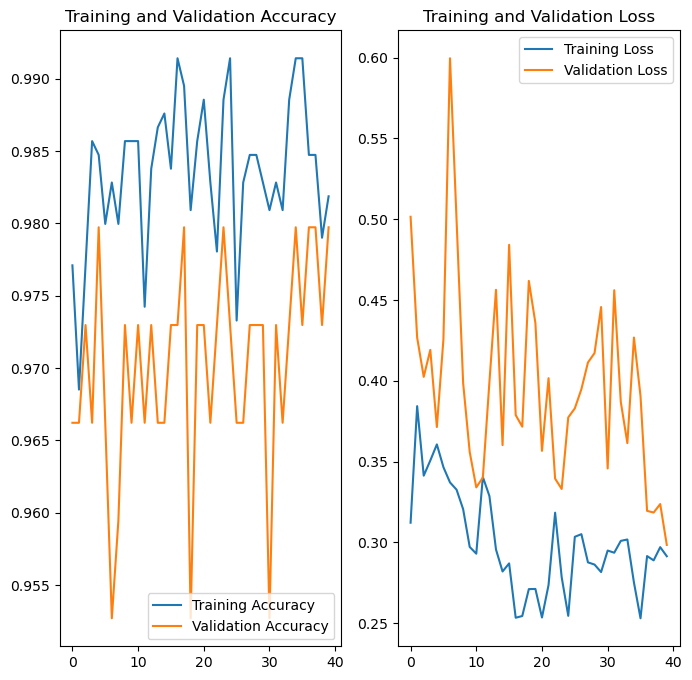

In [64]:
# Visualize the results

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [65]:
# Create a dictionary of train data image counts with their corresponding classnames

# Ensure data_dir_train is a Path object
data_dir_train = Path(data_dir_train)  # Convert to Path if it's a string

image_count = {}

for classname in class_names:
    jpg_images = list(data_dir_train.glob(classname + '/*.jpg'))
    png_images = list(data_dir_train.glob(classname + '/*.png'))

    image_count[classname] = len(jpg_images) + len(png_images)


In [66]:
# Create a dataframe for storing the image counts of respective classes

image_count_df = pd.DataFrame()
num_of_images = list(image_count.values())
image_count_df['Class name'] = class_names
image_count_df['Number of images'] = num_of_images
image_count_df

,Class name,Number of images
0,Don't Go Left,25
1,Don't Go Left or Right,25
2,Don't Go Right,25
3,Don't Go Straight,25
4,Don't Go straight or left,20
5,Don't Overtake from Left,25
6,Go Left,25
7,Go Left or Right,25
8,Go Right,25
9,Go Straight,25


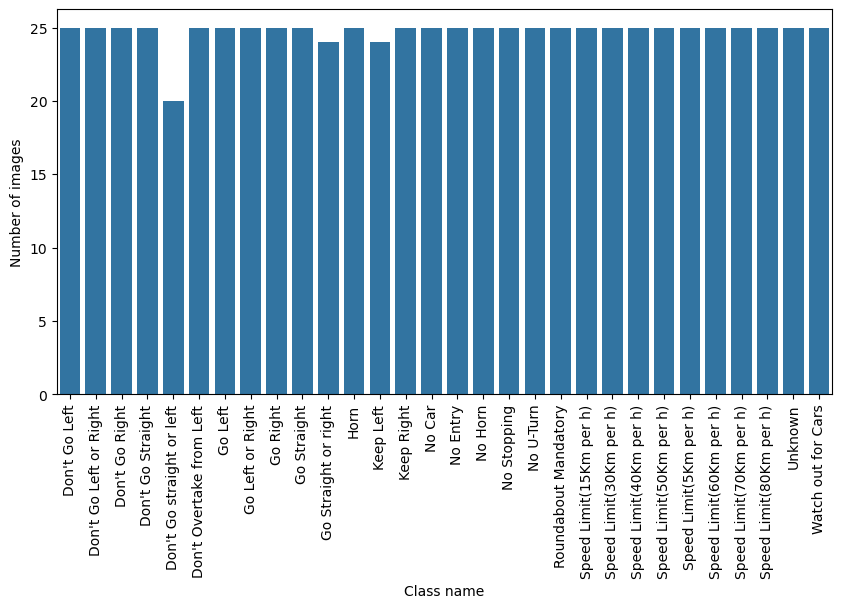

In [67]:
# Plot bar graph to interpret class imbalance in the dataset
plt.figure(figsize=(10, 5))
sns.barplot(x = image_count_df['Class name'], y = image_count_df['Number of images'], data = image_count_df)
plt.xticks(rotation=90)
plt.show()

In [35]:
pip install Augmentor

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [36]:
path_to_training_dataset = root_path+'Train/'
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(150) ## We are adding 50 samples per class to make sure that none of the classes are sparse.

Initialised with 25 image(s) found.
Output directory set to C:/Users/manik/Road Signs classification dataset/Train/Don't Go Left\output.

Processing <PIL.Image.Image image mode=RGB size=160x160 at 0x12555D2C890>: 100%|██████████| 150/150 [00:01<00:00, 140.47 Samples/s]                


Initialised with 25 image(s) found.
Output directory set to C:/Users/manik/Road Signs classification dataset/Train/Don't Go Left or Right\output.

Processing <PIL.Image.Image image mode=RGB size=202x194 at 0x12555FF1310>: 100%|██████████| 150/150 [00:01<00:00, 110.42 Samples/s]                


Initialised with 25 image(s) found.
Output directory set to C:/Users/manik/Road Signs classification dataset/Train/Don't Go Right\output.

Processing <PIL.PngImagePlugin.PngImageFile image mode=RGB size=160x160 at 0x12555D8A5D0>: 100%|██████████| 150/150 [00:01<00:00, 100.78 Samples/s]


Initialised with 25 image(s) found.
Output directory set to C:/Users/manik/Road Signs classification dataset/Train/Don't Go Straight\output.

Processing <PIL.Image.Image image mode=RGB size=82x87 at 0x12555D8BF80>: 100%|██████████| 150/150 [00:01<00:00, 102.32 Samples/s]                  


Initialised with 20 image(s) found.
Output directory set to C:/Users/manik/Road Signs classification dataset/Train/Don't Go straight or left\output.

Processing <PIL.PngImagePlugin.PngImageFile image mode=RGB size=160x160 at 0x12556002C90>: 100%|██████████| 150/150 [00:01<00:00, 96.51 Samples/s] 


Initialised with 25 image(s) found.
Output directory set to C:/Users/manik/Road Signs classification dataset/Train/Don't Overtake from Left\output.

Processing <PIL.Image.Image image mode=RGB size=184x172 at 0x12555CFF2F0>: 100%|██████████| 150/150 [00:01<00:00, 108.02 Samples/s]                


Initialised with 25 image(s) found.
Output directory set to C:/Users/manik/Road Signs classification dataset/Train/Go Left\output.

Processing <PIL.Image.Image image mode=RGB size=143x127 at 0x12556003800>: 100%|██████████| 150/150 [00:01<00:00, 113.77 Samples/s]                


Initialised with 25 image(s) found.
Output directory set to C:/Users/manik/Road Signs classification dataset/Train/Go Left or Right\output.

Processing <PIL.PngImagePlugin.PngImageFile image mode=RGB size=165x150 at 0x12555FF2FF0>: 100%|██████████| 150/150 [00:01<00:00, 94.22 Samples/s]     


Initialised with 25 image(s) found.
Output directory set to C:/Users/manik/Road Signs classification dataset/Train/Go Right\output.

Processing <PIL.Image.Image image mode=RGB size=196x165 at 0x12555D890A0>: 100%|██████████| 150/150 [00:01<00:00, 124.60 Samples/s]                


Initialised with 25 image(s) found.
Output directory set to C:/Users/manik/Road Signs classification dataset/Train/Go Straight\output.

Processing <PIL.Image.Image image mode=RGBA size=281x311 at 0x12555FF2420>: 100%|██████████| 150/150 [00:01<00:00, 125.21 Samples/s]                


Initialised with 24 image(s) found.
Output directory set to C:/Users/manik/Road Signs classification dataset/Train/Go Straight or right\output.

Processing <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=247x249 at 0x12556001550>: 100%|██████████| 150/150 [00:01<00:00, 78.55 Samples/s]   


Initialised with 25 image(s) found.
Output directory set to C:/Users/manik/Road Signs classification dataset/Train/Horn\output.

Processing <PIL.Image.Image image mode=RGB size=126x117 at 0x12555D8AE10>: 100%|██████████| 150/150 [00:00<00:00, 154.29 Samples/s]                


Initialised with 24 image(s) found.
Output directory set to C:/Users/manik/Road Signs classification dataset/Train/Keep Left\output.

Processing <PIL.Image.Image image mode=RGBA size=353x352 at 0x1250B729B20>: 100%|██████████| 150/150 [00:01<00:00, 105.48 Samples/s]                


Initialised with 25 image(s) found.
Output directory set to C:/Users/manik/Road Signs classification dataset/Train/Keep Right\output.

Processing <PIL.Image.Image image mode=RGB size=160x160 at 0x12555D63A10>: 100%|██████████| 150/150 [00:00<00:00, 153.09 Samples/s]                


Initialised with 25 image(s) found.
Output directory set to C:/Users/manik/Road Signs classification dataset/Train/No Car\output.

Processing <PIL.PngImagePlugin.PngImageFile image mode=RGB size=141x122 at 0x12555D8BF80>: 100%|██████████| 150/150 [00:00<00:00, 152.53 Samples/s]


Initialised with 25 image(s) found.
Output directory set to C:/Users/manik/Road Signs classification dataset/Train/No Entry\output.

Processing <PIL.Image.Image image mode=RGB size=110x95 at 0x1250D0685F0>: 100%|██████████| 150/150 [00:01<00:00, 145.73 Samples/s]                 


Initialised with 25 image(s) found.
Output directory set to C:/Users/manik/Road Signs classification dataset/Train/No Horn\output.

Processing <PIL.Image.Image image mode=RGB size=101x95 at 0x1250B6FA420>: 100%|██████████| 150/150 [00:01<00:00, 139.36 Samples/s]                 


Initialised with 25 image(s) found.
Output directory set to C:/Users/manik/Road Signs classification dataset/Train/No Stopping\output.

Processing <PIL.Image.Image image mode=RGB size=231x223 at 0x12555D11A90>: 100%|██████████| 150/150 [00:00<00:00, 168.01 Samples/s]                


Initialised with 25 image(s) found.
Output directory set to C:/Users/manik/Road Signs classification dataset/Train/No U-Turn\output.

Processing <PIL.Image.Image image mode=RGB size=196x181 at 0x12555D8AB10>: 100%|██████████| 150/150 [00:01<00:00, 142.51 Samples/s]                


Initialised with 25 image(s) found.
Output directory set to C:/Users/manik/Road Signs classification dataset/Train/Roundabout Mandatory\output.

Processing <PIL.Image.Image image mode=RGB size=92x92 at 0x12555CFF7A0>: 100%|██████████| 150/150 [00:00<00:00, 161.08 Samples/s]                  


Initialised with 25 image(s) found.
Output directory set to C:/Users/manik/Road Signs classification dataset/Train/Speed Limit(15Km per h)\output.

Processing <PIL.PngImagePlugin.PngImageFile image mode=RGB size=94x87 at 0x1250B580D40>: 100%|██████████| 150/150 [00:01<00:00, 149.04 Samples/s]  


Initialised with 25 image(s) found.
Output directory set to C:/Users/manik/Road Signs classification dataset/Train/Speed Limit(30Km per h)\output.

Processing <PIL.Image.Image image mode=RGB size=142x131 at 0x1250B6FB500>: 100%|██████████| 150/150 [00:01<00:00, 120.17 Samples/s]                


Initialised with 25 image(s) found.
Output directory set to C:/Users/manik/Road Signs classification dataset/Train/Speed Limit(40Km per h)\output.

Processing <PIL.PngImagePlugin.PngImageFile image mode=RGB size=203x187 at 0x125560013D0>: 100%|██████████| 150/150 [00:01<00:00, 145.17 Samples/s]


Initialised with 25 image(s) found.
Output directory set to C:/Users/manik/Road Signs classification dataset/Train/Speed Limit(50Km per h)\output.

Processing <PIL.Image.Image image mode=RGB size=272x230 at 0x1250B2C39E0>: 100%|██████████| 150/150 [00:01<00:00, 136.60 Samples/s]                


Initialised with 25 image(s) found.
Output directory set to C:/Users/manik/Road Signs classification dataset/Train/Speed Limit(5Km per h)\output.

Processing <PIL.Image.Image image mode=RGB size=113x101 at 0x1250D0695E0>: 100%|██████████| 150/150 [00:01<00:00, 142.72 Samples/s]                


Initialised with 25 image(s) found.
Output directory set to C:/Users/manik/Road Signs classification dataset/Train/Speed Limit(60Km per h)\output.

Processing <PIL.Image.Image image mode=RGB size=156x145 at 0x12555FF1880>: 100%|██████████| 150/150 [00:01<00:00, 130.46 Samples/s]                


Initialised with 25 image(s) found.
Output directory set to C:/Users/manik/Road Signs classification dataset/Train/Speed Limit(70Km per h)\output.

Processing <PIL.Image.Image image mode=RGB size=123x113 at 0x125560023F0>: 100%|██████████| 150/150 [00:01<00:00, 135.78 Samples/s]                


Initialised with 25 image(s) found.
Output directory set to C:/Users/manik/Road Signs classification dataset/Train/Speed Limit(80Km per h)\output.

Processing <PIL.Image.Image image mode=RGB size=228x204 at 0x12555CBB110>: 100%|██████████| 150/150 [00:01<00:00, 132.31 Samples/s]                


Initialised with 25 image(s) found.
Output directory set to C:/Users/manik/Road Signs classification dataset/Train/Unknown\output.

Processing <PIL.Image.Image image mode=RGB size=194x156 at 0x12555D2EE10>: 100%|██████████| 150/150 [00:01<00:00, 118.56 Samples/s]                


Initialised with 25 image(s) found.
Output directory set to C:/Users/manik/Road Signs classification dataset/Train/Watch out for Cars\output.

Processing <PIL.Image.Image image mode=RGB size=239x227 at 0x12555FF3530>: 100%|██████████| 150/150 [00:01<00:00, 108.55 Samples/s]                


In [37]:
# Total number of added new samples
data_dir_train = Path(data_dir_train)
# Total number of added new samples
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg'))) + len(list(data_dir_train.glob('*/output/*.png')))
print(image_count_train)

4500


In [38]:
# New path
path_list_new = [x for x in glob.glob(os.path.join(data_dir_train, '*', 'output', '*.jpg'))] + [x for x in glob.glob(os.path.join(data_dir_train, '*', 'output', '*.png'))]
# Print the result to see the paths
print(path_list_new)

["C:\\Users\\manik\\Road Signs classification dataset\\TRAIN\\Don't Go straight or left\\output\\Don't Go straight or left_original_008_001.jpg_1cf99659-3305-471d-9561-b6b97aa272b9.jpg", "C:\\Users\\manik\\Road Signs classification dataset\\TRAIN\\Don't Go straight or left\\output\\Don't Go straight or left_original_008_001.jpg_946421f2-c598-4d6b-8421-6c31f47dfa02.jpg", "C:\\Users\\manik\\Road Signs classification dataset\\TRAIN\\Don't Go straight or left\\output\\Don't Go straight or left_original_008_001.jpg_ce97dc45-4718-4721-9a8c-041a2372baa4.jpg", "C:\\Users\\manik\\Road Signs classification dataset\\TRAIN\\Don't Go straight or left\\output\\Don't Go straight or left_original_008_001.jpg_d7c1d3aa-54d8-438e-98e6-838cfdd8df85.jpg", "C:\\Users\\manik\\Road Signs classification dataset\\TRAIN\\Don't Go straight or left\\output\\Don't Go straight or left_original_008_001.jpg_dcfaba54-4256-4931-9a04-8125e5e2c1b8.jpg", "C:\\Users\\manik\\Road Signs classification dataset\\TRAIN\\Don't Go

In [39]:
# Respective class names

# Include both .jpg and .png files and extract the directory names
lesion_list_new = [
    os.path.basename(os.path.dirname(os.path.dirname(y))) 
    for y in glob.glob(os.path.join(data_dir_train, '*', 'output', '*.jpg')) + glob.glob(os.path.join(data_dir_train, '*', 'output', '*.png'))]
print(lesion_list_new)

["Don't Go straight or left", "Don't Go straight or left", "Don't Go straight or left", "Don't Go straight or left", "Don't Go straight or left", "Don't Go straight or left", "Don't Go straight or left", 'Go Left or Right', 'Go Left or Right', 'Go Left or Right', 'Go Left or Right', 'Go Straight', 'Go Straight', 'Go Straight', 'Go Straight', 'Go Straight', 'Go Straight or right', 'Go Straight or right', 'Go Straight or right', 'Go Straight or right', 'Go Straight or right', 'Go Straight or right', 'Go Straight or right', 'Go Straight or right', "Don't Go Left", "Don't Go Left", "Don't Go Left", "Don't Go Left", "Don't Go Left", "Don't Go Left", "Don't Go Left", "Don't Go Left", "Don't Go Left", "Don't Go Left", "Don't Go Left", "Don't Go Left", "Don't Go Left", "Don't Go Left", "Don't Go Left", "Don't Go Left", "Don't Go Left", "Don't Go Left", "Don't Go Left", "Don't Go Left", "Don't Go Left", "Don't Go Left", "Don't Go Left", "Don't Go Left", "Don't Go Left", "Don't Go Left", "Don't 

In [40]:
# Zip the paths and its corresponding labels into a dictionary

dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [41]:
# Create a dataframe for storing paths and labels
df = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])

In [42]:
# Check for the number of images in each class

df['Label'].value_counts()

Label
Don't Go straight or left    150
Go Left or Right             150
Unknown                      150
Speed Limit(80Km per h)      150
Speed Limit(70Km per h)      150
Speed Limit(60Km per h)      150
Speed Limit(5Km per h)       150
Speed Limit(50Km per h)      150
Speed Limit(40Km per h)      150
Speed Limit(30Km per h)      150
Speed Limit(15Km per h)      150
Roundabout Mandatory         150
No U-Turn                    150
No Stopping                  150
No Horn                      150
No Entry                     150
No Car                       150
Keep Right                   150
Keep Left                    150
Horn                         150
Go Right                     150
Go Left                      150
Don't Overtake from Left     150
Don't Go Straight            150
Don't Go Right               150
Don't Go Left or Right       150
Don't Go Left                150
Go Straight or right         150
Go Straight                  150
Watch out for Cars           150
Name

In [43]:
batch_size = 32
img_height = 180
img_width = 180
num_classes = 30

In [44]:
# TRAIN DATASET created using augmented data and original training data
# Dataset is created using seed=123 and tf.keras.preprocessing.image_dataset_from_directory
# Resizing images to the size img_height*img_width

data_dir_train = root_path+'TRAIN/'

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 5243 files belonging to 30 classes.
Using 4195 files for training.


In [45]:
# VALIDATION DATASET created using augmented data and original training data
# Dataset is created using seed=123 and tf.keras.preprocessing.image_dataset_from_directory
# Resizing images to the size img_height*img_width

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 5243 files belonging to 30 classes.
Using 1048 files for validation.


In [46]:
# Let us create a new model with augmented data along with the original data

model = Sequential([layers.Rescaling(1./255, input_shape=(img_height, img_width,3))])

# 1st convolution layer
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

# 2nd convolution layer 
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

# 3rd convolution layer
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

# 4th convolution layer
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

# 5th convolution layer with Dropout layer
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

# Fully connected layer 1 with Dropout layer and l2 regularizer
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.0105)))
model.add(Dropout(0.20))

# Output layer
model.add(Dense(num_classes, activation = "softmax"))

In [47]:
# Compile the model using 'adam' optimizer and 'SparseCategoricalCrossentropy' loss function

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [48]:
# View the summary of all layers

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 45, 45, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 22, 22, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 22, 22, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 30)             │         3,870 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 278,558 (1.06 MB)

 Trainable params: 278,558 (1.06 MB)

 Non-trainable params: 0 (0.00 B)

In [49]:
# Train the model for 30 epochs
epochs=30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs)

Epoch 1/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 26s 517ms/step - accuracy: 0.0294 - loss: 5.2544 - val_accuracy: 0.0338 - val_loss: 3.9008
Epoch 2/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 13s 398ms/step - accuracy: 0.0707 - loss: 3.6789 - val_accuracy: 0.1014 - val_loss: 3.2284
Epoch 3/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 11s 332ms/step - accuracy: 0.1075 - loss: 3.1768 - val_accuracy: 0.2905 - val_loss: 2.7813
Epoch 4/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 9s 277ms/step - accuracy: 0.2742 - loss: 2.6409 - val_accuracy: 0.5878 - val_loss: 1.8356
Epoch 5/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 9s 272ms/step - accuracy: 0.5495 - loss: 1.7609 - val_accuracy: 0.7500 - val_loss: 1.4284
Epoch 6/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 11s 339ms/step - accuracy: 0.7191 - loss: 1.2665 - val_accuracy: 0.8514 - val_loss: 1.0366
Epoch 7/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 12s 371ms/step - accuracy: 0.8103 - loss: 0.9450 - val_accuracy: 0.9054 - val_loss: 0.7171
Epoch 8/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 12s 359ms/step - accuracy: 0.8573 - loss: 0.7783 - val_accura

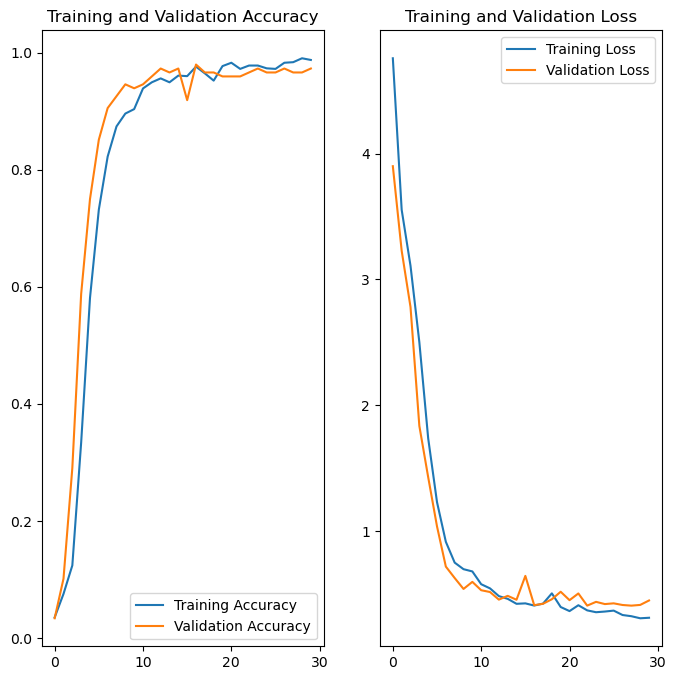

In [50]:
# Visualize the results

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

255.0 0.45846248
(180, 180, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


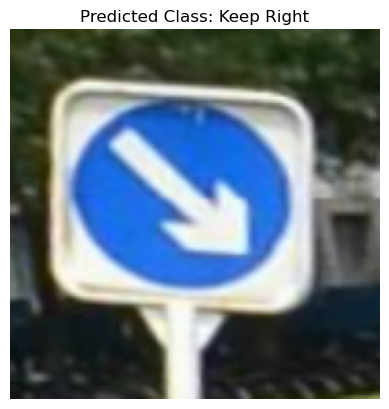

In [68]:
# Step 1: Extract the nth image from validation dataset (for example)
image_index = 27
inference_image = list(val_ds.unbatch().map(lambda x, y: x).take(image_index + 1))[-1]

# Step 2: Show max, min, shape
print(inference_image.numpy().max(), inference_image.numpy().min())
print(inference_image.shape)

# Step 3: Predict using the model
prediction = model.predict(inference_image.numpy().reshape(1, 180, 180, 3))
predicted_class = np.argmax(prediction)

# Step 4: Get the predicted class name
predicted_class_name = class_names[predicted_class]

# Step 5: Display the image being tested with class name
plt.imshow(inference_image.numpy().astype("uint8"))
plt.title(f"Predicted Class: {predicted_class_name}")
plt.axis("off")
plt.show()


In [69]:
# Step 1: Unbatch the validation dataset to extract images and true labels
true_labels = []
predicted_labels = []

for images, labels in val_ds.unbatch().batch(32):  # batch again for efficient prediction
    preds = model.predict(images)
    predicted_classes = np.argmax(preds, axis=1)
    
    predicted_labels.extend(predicted_classes)
    true_labels.extend(labels.numpy())

# Step 2: Convert to NumPy arrays
true_labels = np.array(true_labels)
predicted_labels = np.array(predicted_labels)

# Step 3: Calculate metrics
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels, average='weighted', zero_division=0)
recall = recall_score(true_labels, predicted_labels, average='weighted', zero_division=0)
f1 = f1_score(true_labels, predicted_labels, average='weighted', zero_division=0)
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Step 4: Print results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("\nConfusion Matrix:\n", conf_matrix)

# Optional: Detailed classification report
print("\nClassification Report:\n", classification_report(true_labels, predicted_labels, target_names=class_names))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
Accuracy: 0.9797297297297297
Precision: 0.9842342342342344
Recall: 0.9797297297297297
F1-score: 0.9803385803385803

Confusion Matrix:
 [[6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 6 0 0 0 0 0 0 0 0 